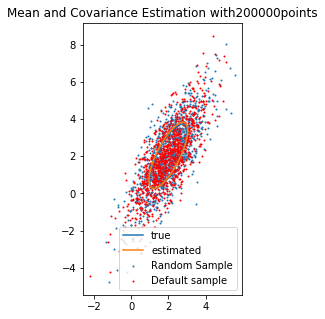

In [50]:
from scipy.linalg import cholesky
import numpy as np
import numpy as np
import scipy
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special


def plot2dcov(mean, cov, k, label, **kwargs):
    #fig, ax = plt.subplots(figsize=(6, 4))
    L = scipy.linalg.cholesky(cov, lower=True)
    theta = np.linspace(0, 2 * np.pi, 100)
    points = np.array([k * np.cos(theta), k * np.sin(theta)]).T
    points = mean + points @ (L.T)
    ax.plot(points[:, 0], points[:, 1], label=label)
    ax.set_aspect('equal')
    plt.legend()
    
def Covariance(x):
    return ((x-Sample_mean(x)).T)@(x-Sample_mean(x))/(x.shape[0]-1)
    
def Sample_mean(x):
    return np.mean(x, axis=0)

def random_points(mean, cov, x):
    """
    Gaussian projection
    """
    L = scipy.linalg.cholesky(cov, lower=True)
    return mean + (L @ x.reshape(-1,2,1)).reshape(-1,2) # Affine transformation

mean = np.array([2, 2]) # target mean
cov = np.array([[1, 1.3], [1.3, 3]]) # target covariance

fig, ax = plt.subplots(figsize=(10,5))
x = np.random.normal(size=(1000, 2)) # sampling points
points = random_points(mean, cov, x) # Sampling from gaussian

plot2dcov(mean, cov, 1, 'true', c="red")
plot2dcov(Sample_mean(points), Covariance(points), 1,'estimated', c="green")

default = np.random.multivariate_normal(mean=mean, cov=cov, size=1000) # multivariate sampling by default func

ax.scatter(points[:, 0], points[:, 1], s=1, label='Random Sample')
ax.scatter(default[:, 0], default[:, 1], s=1, c="r", label='Default sample')
plt.title('Mean and Covariance Estimation with'+str(2*(10**i))+'points')
plt.legend()
plt.show()

In [46]:
points

array([[ 1.91195445, -0.37956896],
       [ 2.21647509,  1.25876256],
       [ 1.5711194 ,  0.59539292],
       ...,
       [ 2.60787591,  3.44533402],
       [ 1.26365101,  1.29995931],
       [ 0.75588614,  0.43536187]])

array([[ 3.09189501,  3.92993409],
       [ 2.64606443,  0.98542723],
       [ 2.26839557,  1.52980057],
       ...,
       [ 3.13081687,  1.04167946],
       [ 1.34946036, -0.96882729],
       [ 2.70995703,  4.77337675]])